# **Data Science mega case study**

---



In [287]:
# https://www.geeksforgeeks.org/techniques-to-evaluate-accuracy-of-classifier-in-data-mining/

 Importing libraries

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from google.colab import drive
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


# drive.mount('/content/drive')

Import Data

In [289]:
# df = pd.read_csv('/content/drive/My Drive/MyDataSets/diabetes-2-1.csv')
df = pd.read_csv('./diabetes-2-1.csv')


df.shape

(768, 9)

Total Number of records

In [290]:
print("Number of records:", df.shape[0])

Number of records: 768


Data Types for all columns

In [291]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Deal with missing values

In [292]:
# Created a funtion to reduce redunancy

def check_missing_values(df):
    # Check for missing values in each column
    missing_values = df.isnull().sum()

    # Print the count of missing values for each column
    print("Missing Values:\n", missing_values)

    # Calculate the percentage of missing values for each column
    total_entries = len(df)
    percentage_missing = (missing_values / total_entries) * 100

    # Print the percentage of missing values for each column
    print("\nPercentage of Missing Values:\n", percentage_missing)

check_missing_values(df)





Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Percentage of Missing Values:
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


Descriptive Statistics

In [293]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 Identify columns with missing values and find out their frequency?

In [294]:
# Exclude "Outcome" and "Pregnancies" columns from the check because the zeros are meaningful
columns_to_ignore = ["Outcome", "Pregnancies"]
missing_values = (df.drop(columns=columns_to_ignore) == 0).sum()

# Display columns with a minimum value of 0
print("Columns with a missing values:")
print(missing_values)

Columns with a missing values:
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


Number of positive and negative patients based on target (dependent) variable

Outcome
0    500
1    268
Name: count, dtype: int64


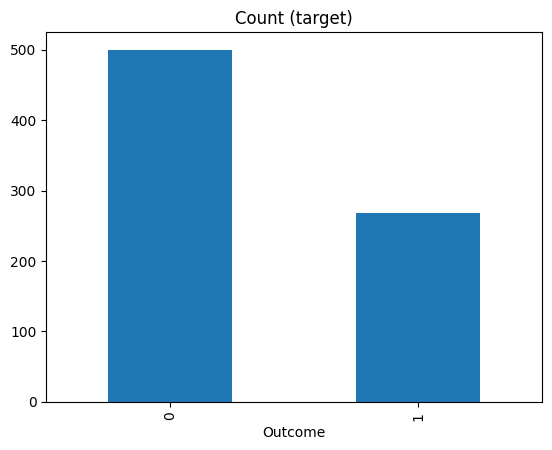

In [295]:
# Count of positive and negative outcomes
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)
# Plot thr outcome counts
outcome_counts.plot(kind='bar', title='Count (target)');


Correlation among all dependent and independent variables

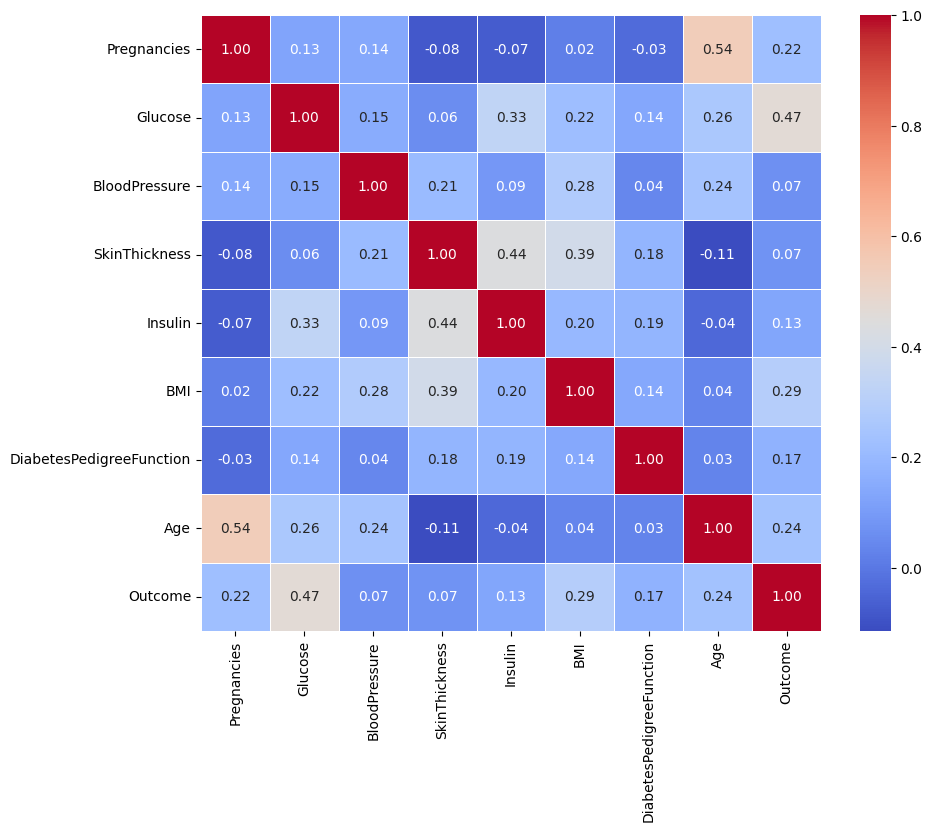

In [296]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

Replace these zero values with NAN?

In [297]:
# Replace all occurrences of 0 with NaN in selected columns
replaced_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]
df[replaced_columns] = df[replaced_columns].replace({0: np.nan})

# Display the DataFrame after replacement
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Check out the variables for 0 value once again

In [298]:
# Columns to be ignored during the missing values calculation
columns_to_ignore = ["Outcome", "Pregnancies"]

# Exclude specified columns and count the occurrences of 0
missing_values = (df.drop(columns=columns_to_ignore) == 0).sum()

# Display the count of missing values
missing_values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Check out the missing values counts per variable

In [299]:
# use isna method to check for missing values in the dataframe
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

 Identify the mean value for each variable

In [300]:
# use mean method method to check for the mean for each variable in the data frame

df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

For the following columns, fill missing values with mean column values?
Glucose
BloodPressure
SkinThickness
Insulin
BMI

In [301]:
# use the fillna method to replace the empty values with the mean in each column with empty values
df.fillna( {'Glucose': df['Glucose'].mean(), 'BloodPressure': df['BloodPressure'].mean(), 'SkinThickness': df['SkinThickness'].mean(), 'Insulin': df['Insulin'].mean(), 'BMI': df['BMI'].mean()}, inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [302]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Distribution per variable

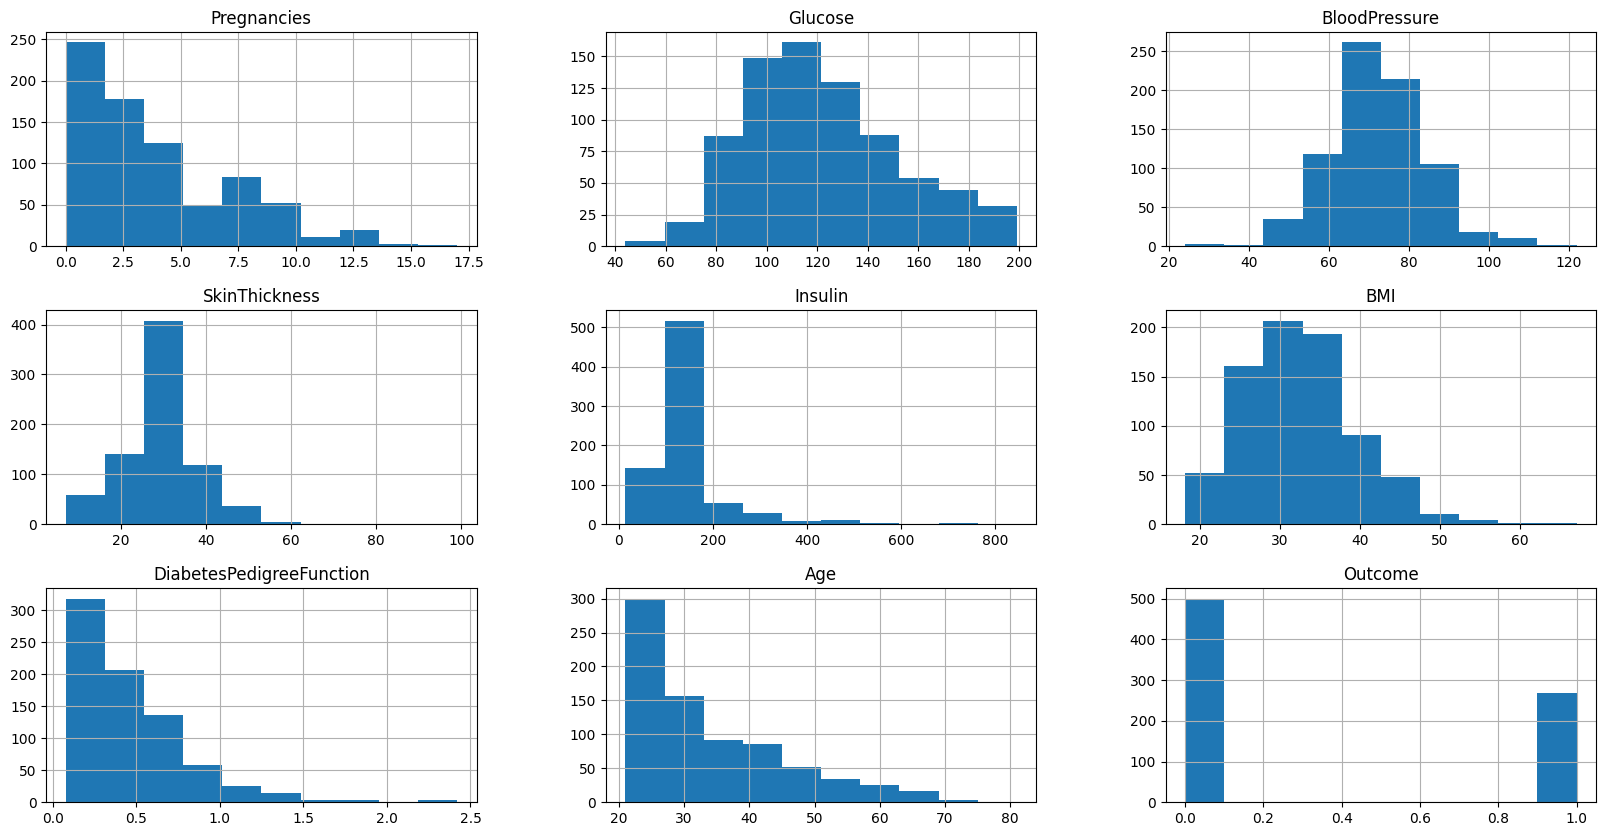

In [303]:
df.hist(figsize=(20, 10))
plt.show()

The distribution of pregnancies in this dataset is right-skewed, with a notable prevalence of women having zero pregnancies. The skewness indicates that a substantial portion of the dataset consists of individuals who have not been pregnant, and as the number of pregnancies increases, the frequency of individuals with higher pregnancy counts decreases.
Glucose : On the dataset, more than 120 individuals exhibit a glucose level up to 120. This suggests that a significant portion of the population studied has a glucose concentration within a range considered normal or below a certain threshold.
A symmetrical histogram of blood pressure values suggests a balanced distribution of measurements around a central point. In this case, the symmetry implies that roughly an equal number of individuals exhibit blood pressure values above and below the central tendency. This balance in the distribution indicates that the data is evenly spread across a range of blood pressure values, with no significant skewness towards higher or lower readings.
Skin Thickness is Right Skewed
The distribution of Body Mass Index (BMI) values in this dataset is symmetrical. This symmetry implies that individuals with BMIs above and below the central tendency are evenly distributed, contributing to a balanced representation of BMI values in the studied population.
Diabetes Pedigree Function is Right Skewed
The distribution of ages in this dataset is right-skewed, signifying that a significant proportion of individuals have lower ages. As age increases, the frequency of individuals decreases, with fewer occurrences of higher age values

Box Plot for Each Variable

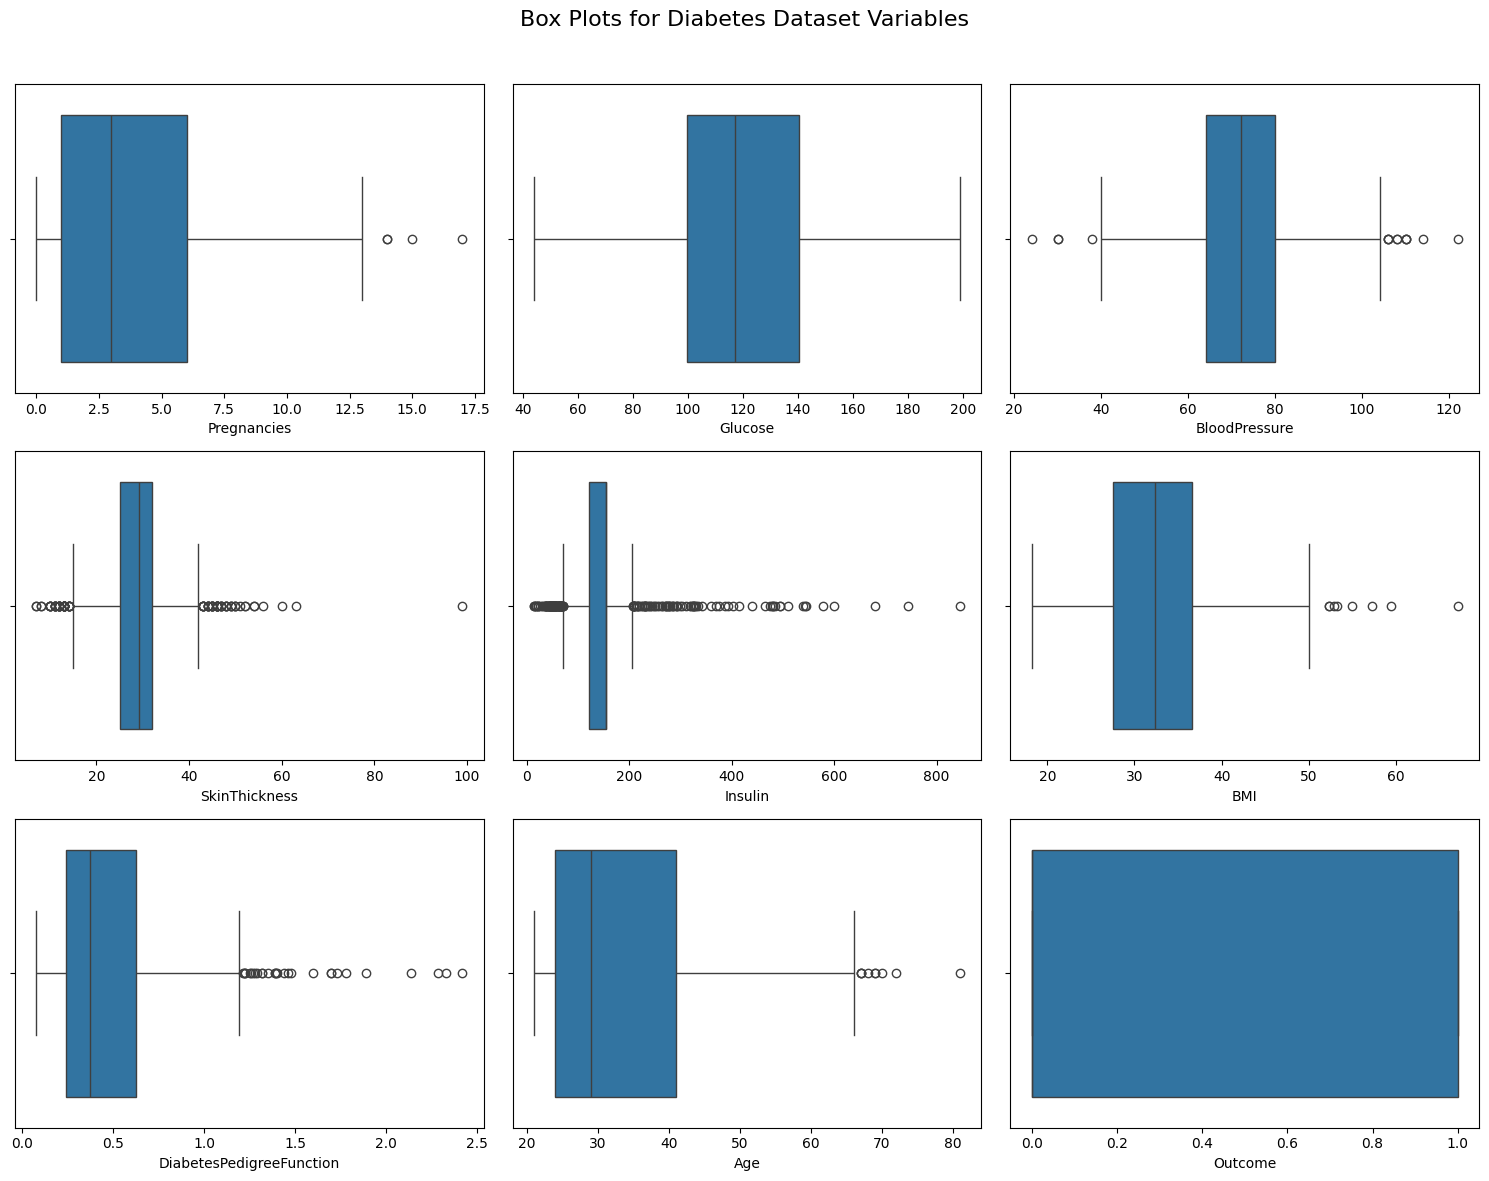

In [304]:

# Box plots for all variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Box Plots for Diabetes Dataset Variables', fontsize=16)

sns.boxplot(ax=axes[0, 0], x=df['Pregnancies'])
sns.boxplot(ax=axes[0, 1], x=df['Glucose'])
sns.boxplot(ax=axes[0, 2], x=df['BloodPressure'])
sns.boxplot(ax=axes[1, 0], x=df['SkinThickness'])
sns.boxplot(ax=axes[1, 1], x=df['Insulin'])
sns.boxplot(ax=axes[1, 2], x=df['BMI'])
sns.boxplot(ax=axes[2, 0], x=df['DiabetesPedigreeFunction'])
sns.boxplot(ax=axes[2, 1], x=df['Age'])
sns.boxplot(ax=axes[2, 2], x=df['Outcome'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Pregnancies:
The median number of pregnancies is around 3, with a significant number of outliers on the higher side.
The interquartile range (IQR) spans from approximately 1 to 6 pregnancies.
Glucose:
The median glucose level is around 117, with a relatively narrow IQR.
There are no outliers in the glucose distribution.
BloodPressure:
The median blood pressure is around 72, and the IQR spans from approximately 64 to 80.
There are no outliers in the blood pressure distribution.
SkinThickness:
The median skin thickness is approximately 29.
The distribution has a wide range, and there are potential outliers on the higher side.
Insulin:
The median insulin level is around 155, with a significant number of outliers on the higher side.
The IQR is relatively narrow compared to the spread of the data.
BMI (Body Mass Index):
The median BMI is around 32.4, with a wide distribution and a few potential outliers on the higher side.
DiabetesPedigreeFunction:
The median value for the diabetes pedigree function is around 0.37.
The distribution has a moderate spread, and there are a few potential outliers on the higher side.
Age:
The median age is around 29, with a relatively narrow IQR.
There are a few potential outliers on the higher side of the age distribution.
Outcome:
Since Outcome is a binary variable (0 or 1), the box plot shows the distribution of outcomes.

demographic and distribution of diabetics/nondiabetics across age variable?

In [305]:
# Identify outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a mask to filter outliers
outlier_mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# To Remove the outliers from the dataset
df = df[outlier_mask]


print("New DataFrame size after Outlier removal:", df.shape)

New DataFrame size after Outlier removal: (515, 9)


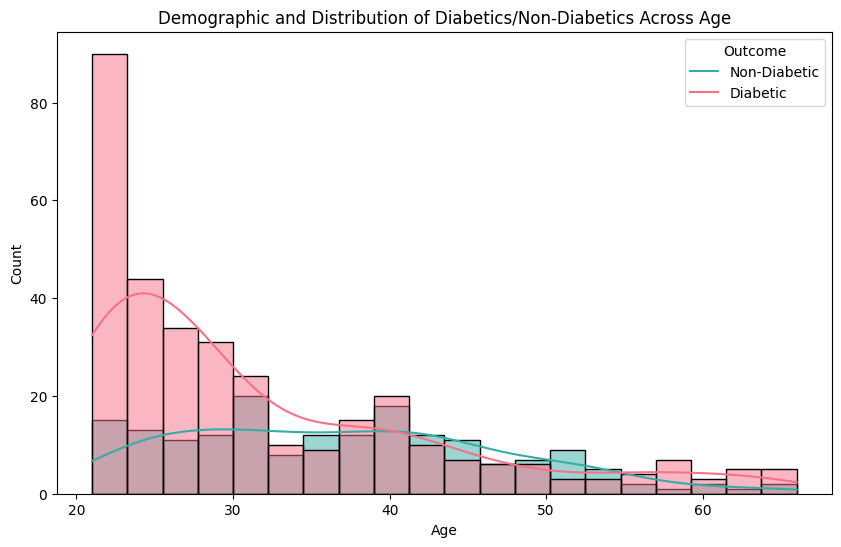

In [306]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, bins=20, palette='husl')
plt.title('Demographic and Distribution of Diabetics/Non-Diabetics Across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

 how the number of pregnancies impacts diabetes

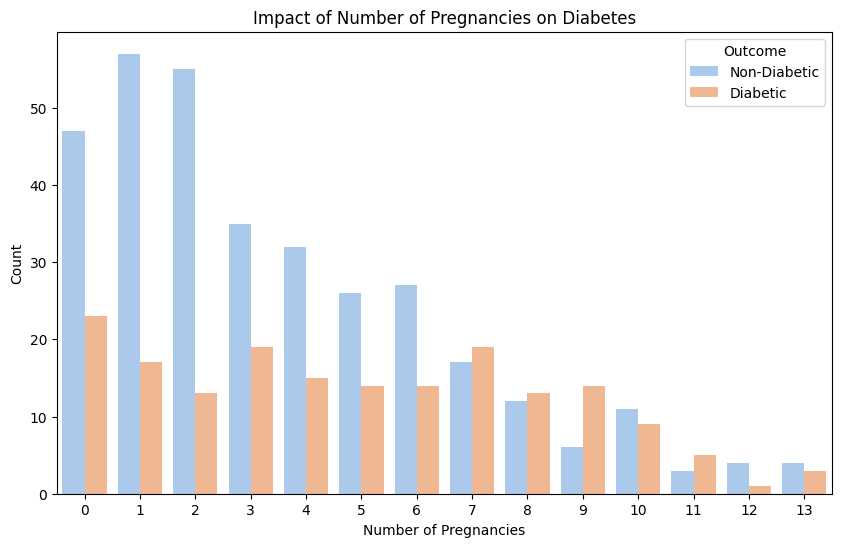

In [307]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pregnancies', hue='Outcome', palette='pastel')
plt.title('Impact of Number of Pregnancies on Diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

 Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to our dataset as a new column.
BMI = 0 then “NA”
0 < BMI < 18.5 then “Under Weight”
18.5 <= BMI < 25 then “Normal”
25 <= BMI < 30 then “Overweight”
30 <= BMI then “Obese”

In [308]:
def categorize_bmi(bmi):
    if bmi == 0:
        return "NA"
    elif 0 < bmi < 18.5:
        return "Under Weight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi:
        return "Obese"

df["BMI_tier"]  = df['BMI'].apply(categorize_bmi)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0,Normal
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Obese


Plot BMI tier histogram

<Axes: >

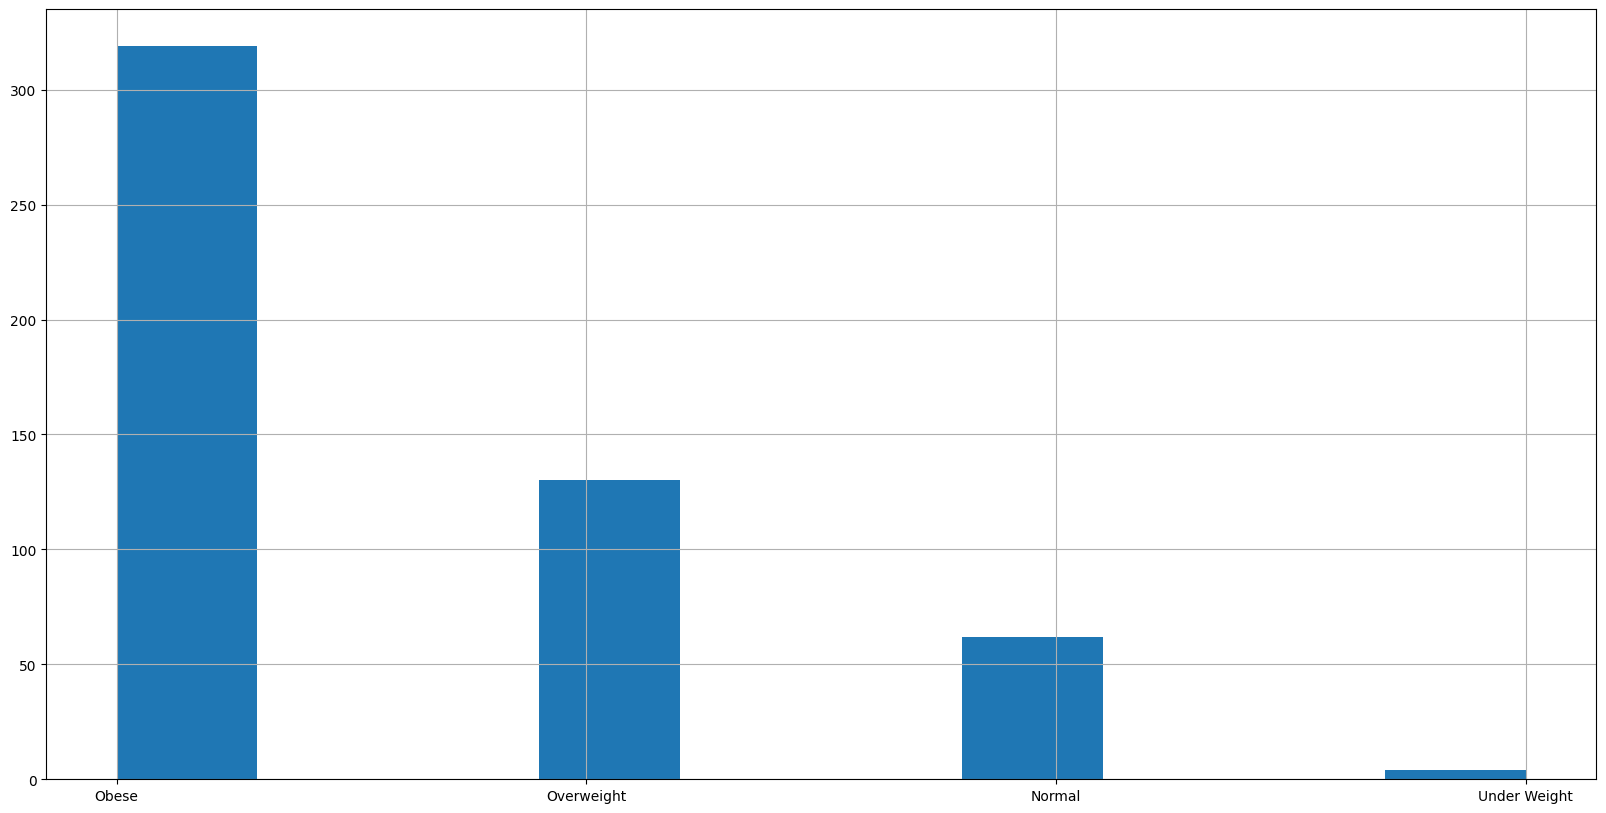

In [309]:
df["BMI_tier"].hist(figsize=(20, 10))

 obese individuals

Number of Obese Individuals: 319


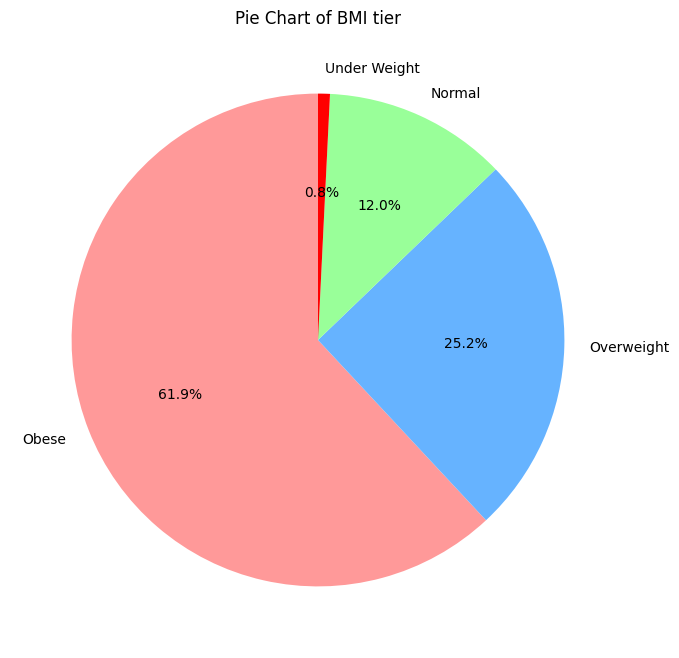

In [310]:

category_counts = df['BMI_tier'].value_counts()
obese_count = (df['BMI_tier'] == 'Obese').sum()
print("Number of Obese Individuals:",obese_count)
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99', "#FF0000"])
plt.title('Pie Chart of BMI tier')
plt.ylabel('')
plt.show()




### 23. Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column.

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”

In [311]:
def categorize_ogtt(glucose):
    if glucose == 0:
        return "NA"
    elif glucose < 140:
        return "Normal"
    elif 140 <= glucose < 198:
        return "Impaired Glucose Tolerance"
    elif 198 <= glucose:
        return "Diabetic Level"

# Apply the function to create 'OGTT_tier'
df['OGTT_tier'] = df['Glucose'].apply(categorize_ogtt)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier,OGTT_tier
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese,Impaired Glucose Tolerance
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal,Impaired Glucose Tolerance
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight,Normal
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,Overweight,Normal


How many individuals are categorized as “Diabetic Level” in our newly created variable, “OGTT_tier”? Plot the “OGTT_tier” histogram?

Number of Diabetic Individuals: 0


<Axes: >

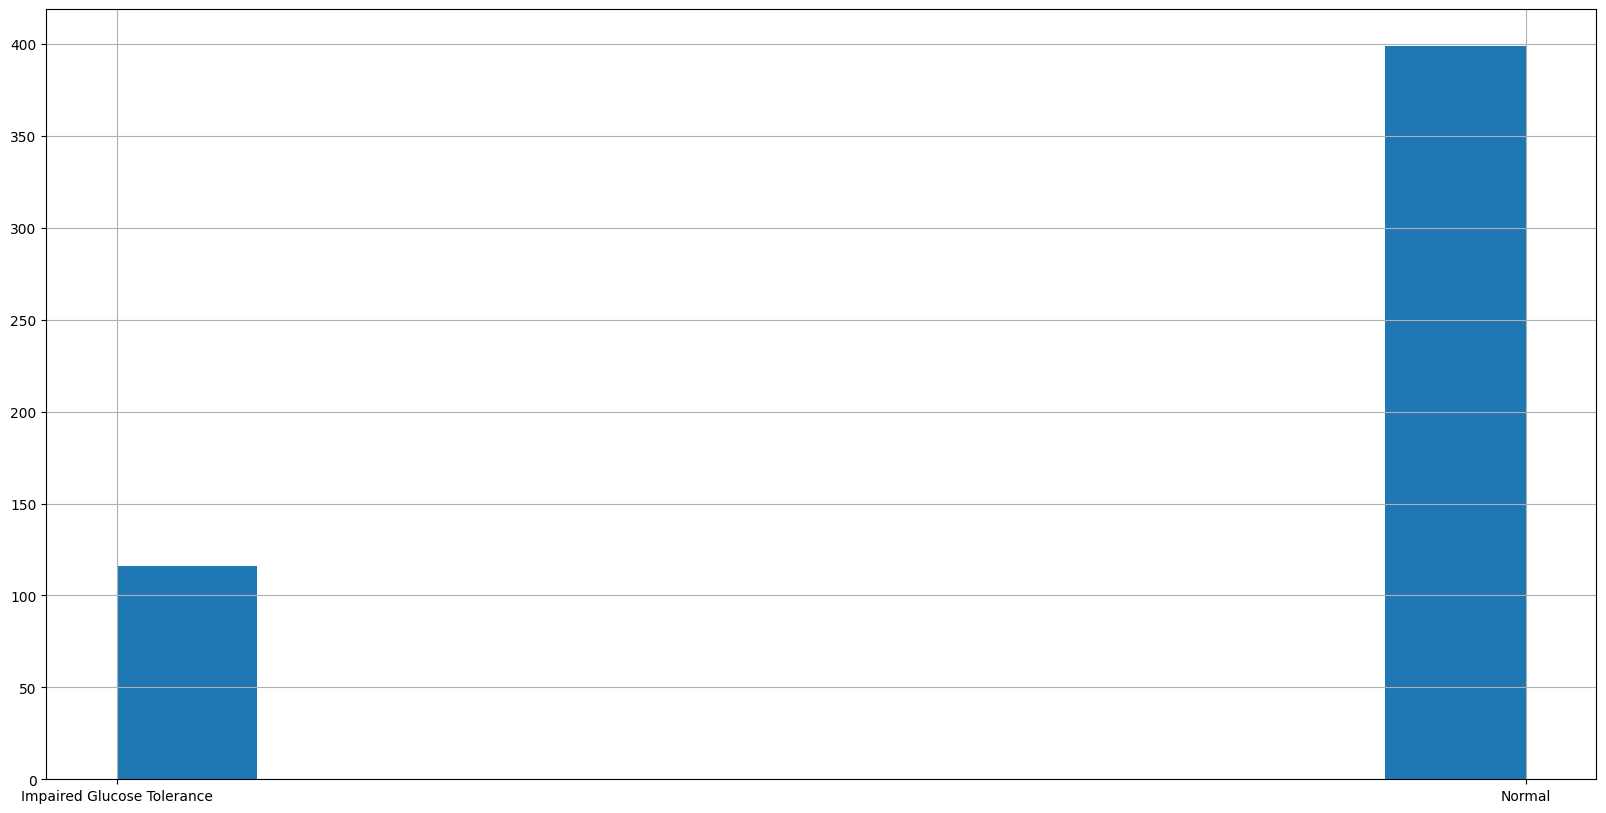

In [312]:
diabetic_count = (df['OGTT_tier'] == 'Diabetic Level').sum()
print("Number of Diabetic Individuals:",diabetic_count)
df["OGTT_tier"].hist(figsize=(20, 10))

Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?

In [313]:
impaired_glucose_diabetic_count = df[(df['OGTT_tier'] == 'Impaired Glucose Tolerance') & (df['Outcome'] == 1)].shape[0]

normal_ogtt_diabetic_count = df[(df['OGTT_tier'] == 'Normal') & (df['Outcome'] == 1)].shape[0]

print("Number of individuals with 'Impaired Glucose Tolerance' and diabetes:", impaired_glucose_diabetic_count)
print("Number of individuals with 'Normal' OGTT_tier and diabetes:", normal_ogtt_diabetic_count)
print(df['OGTT_tier'].unique())
print(df['Outcome'].unique())

Number of individuals with 'Impaired Glucose Tolerance' and diabetes: 79
Number of individuals with 'Normal' OGTT_tier and diabetes: 100
['Impaired Glucose Tolerance' 'Normal']
[1 0]


Encode Categoricak Variables

In [314]:
# for x in df.columns:
#     #prinfting unique values
#     print(x ,':', len(df[x].unique()))
encoded_df = pd.get_dummies(df, columns=['BMI_tier', 'OGTT_tier'])

encoded_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier_Normal,BMI_tier_Obese,BMI_tier_Overweight,BMI_tier_Under Weight,OGTT_tier_Impaired Glucose Tolerance,OGTT_tier_Normal
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,False,True,False,False,True,False
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,False,False,True,False,False,True
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,True,False,False,False,True,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,False,False,True,False,False,True
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,False,False,True,False,False,True


In [315]:
df = encoded_df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier_Normal,BMI_tier_Obese,BMI_tier_Overweight,BMI_tier_Under Weight,OGTT_tier_Impaired Glucose Tolerance,OGTT_tier_Normal
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,False,True,False,False,True,False
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,False,False,True,False,False,True
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,True,False,False,False,True,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,False,False,True,False,False,True
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0,True,False,False,False,False,True
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,False,True,False,False,False,True
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,False,False,True,False,False,True
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,False,True,False,False,False,True


In [316]:

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values


Step 5: Split the data into test and train sets

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 20)

# Training Model using different methods

## Helper funtions


In [318]:

def plot_confusion_matrix(y_true, y_pred):
    # Calculate confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
def calculate_specificity_sensitivity(y_test, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    print(f"Model: {model_name}")
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    
    return specificity, sensitivity




def get_cross_val_scores(classifier, X_train, y_train, cv=5):
    """
    Perform k-fold cross-validation and return the cross-validation scores.

    Parameters:
    classifier : sklearn classifier object
        The classifier for which cross-validation needs to be performed.
    X_train : array-like of shape (n_samples, n_features)
        The input training data.
    y_train : array-like of shape (n_samples,)
        The target labels.
    cv : int, optional (default=5)
        Number of folds in cross-validation.

    Returns:
    cross_val_scores : array of shape (cv,)
        Array containing the cross-validation scores for each fold.
    """
    # Perform k-fold cross-validation
    cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=cv)

    return cross_val_scores

## Support Vector Machine

In [319]:
# Create the pipeline with StandardScaler and SVC
svm_pipe = make_pipeline(StandardScaler(), svm.SVC())

# Fit the StandardScaler on training data
svm_pipe.fit(X_train, y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel function
    'svc__gamma': [0.01, 0.1, 1]  # Hyperparameter for some kernels (e.g., rbf)
}

# Perform grid search
grid_search_svm = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

Testing The Model

In [320]:
# svr_pipe.predict(X_test)
y_pred_svm = grid_search_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the Support Vector Machine pipeline: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))
print("Cross Validation Score",get_cross_val_scores(grid_search_svm, X_train, y_train, cv=5 ).mean())

Accuracy of the Support Vector Machine pipeline: 0.7674
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       111
           1       0.82      0.44      0.57        61

    accuracy                           0.77       172
   macro avg       0.79      0.69      0.71       172
weighted avg       0.78      0.77      0.75       172

Cross Validation Score 0.7287297527706735


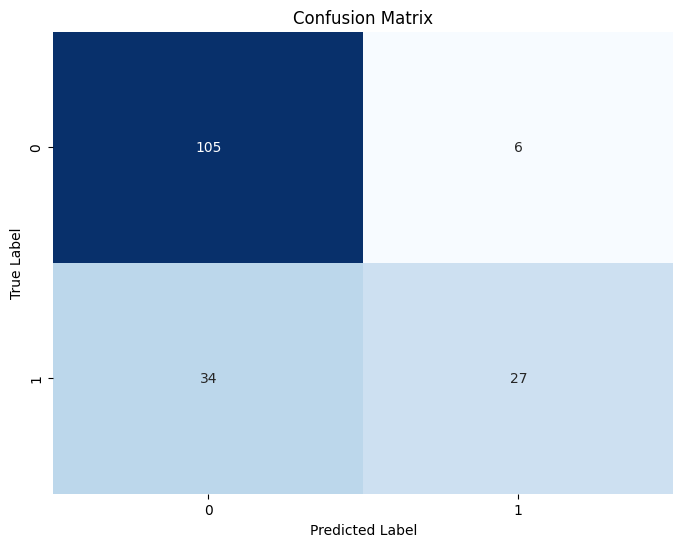

Model: Support Vector Machine
Sensitivity: 0.4426229508196721
Specificity: 0.9459459459459459


(0.9459459459459459, 0.4426229508196721)

In [321]:
plot_confusion_matrix(y_test, y_pred_svm)
calculate_specificity_sensitivity(y_test, y_pred_svm, "Support Vector Machine")



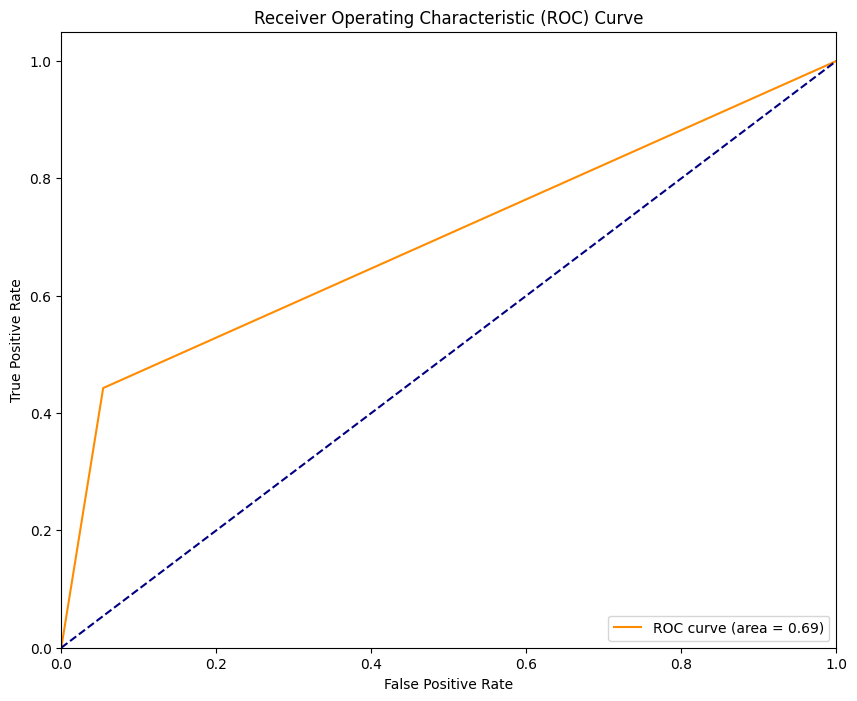

In [342]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predicted probabilities
# Replace y_test and y_pred with your actual data

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_svm)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [322]:
log_reg_pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000, class_weight='balanced'))


log_reg_pipe.fit(X_train, y_train)

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Solver for optimization
}

# Perform grid search
grid_search_logreg = GridSearchCV(log_reg_pipe, param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
# log_reg_pipe.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__solver': ['liblinear',
                                                        'newton-cg', 'lbfgs',
                                                        'sag', 'saga']},
             scoring='accuracy')

Testing the model


In [323]:
y_pred_lr = log_reg_pipe.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the Logistic Regression pipeline: {accuracy_lr:.4f}")
print(classification_report(y_test, y_pred_lr))
print("Cross Validation Score",get_cross_val_scores(log_reg_pipe, X_train, y_train, cv=5 ).mean())

Accuracy of the Logistic Regression pipeline: 0.7965
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       111
           1       0.70      0.75      0.72        61

    accuracy                           0.80       172
   macro avg       0.78      0.79      0.78       172
weighted avg       0.80      0.80      0.80       172

Cross Validation Score 0.7082693947144075


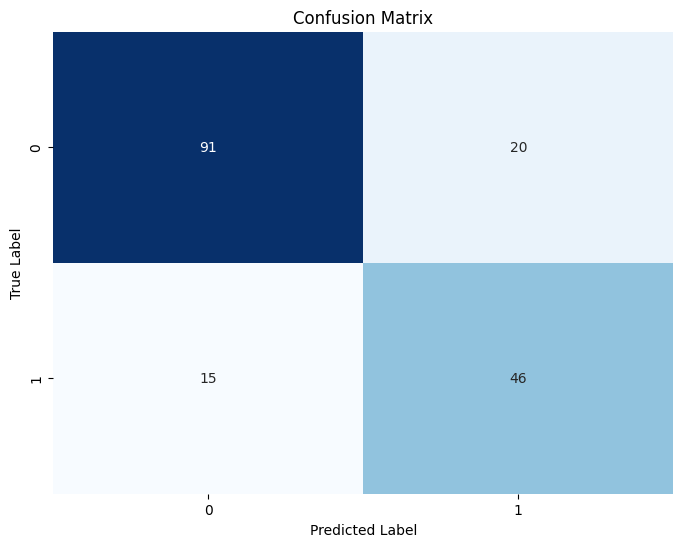

Model: Logistic Regression
Sensitivity: 0.7540983606557377
Specificity: 0.8198198198198198


(0.8198198198198198, 0.7540983606557377)

In [324]:
plot_confusion_matrix(y_test, y_pred_lr)
calculate_specificity_sensitivity(y_test, y_pred_lr, "Logistic Regression")


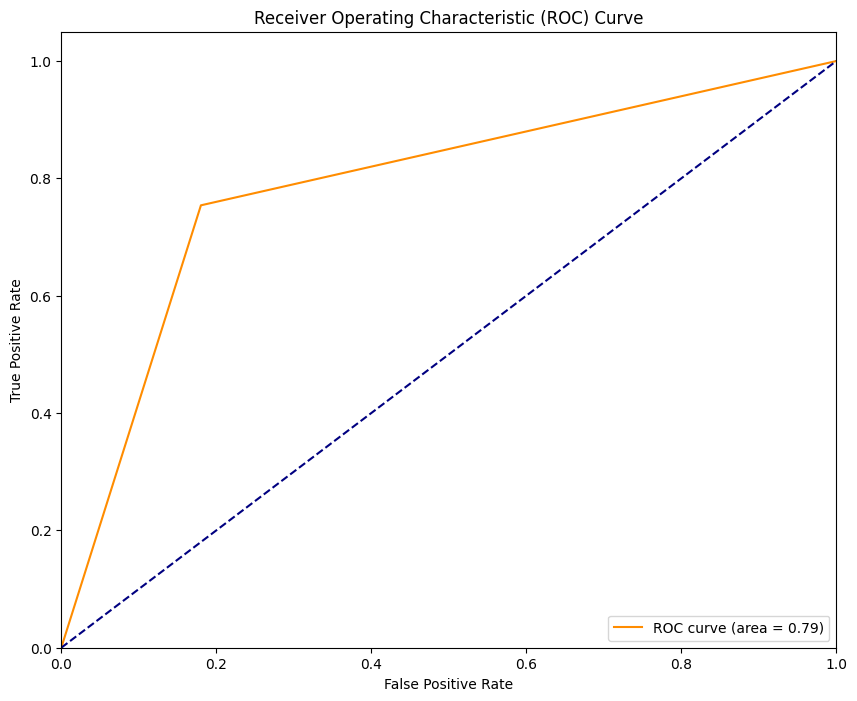

In [340]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_lr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier

In [334]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    
}

# Create the model
model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters
rf_clf_pipe = make_pipeline(StandardScaler(),RandomForestClassifier(**best_params))
rf_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=5))])

Testing The Model

In [337]:
rf_clf_pipe.predict(X_test)
y_pred_rf = rf_clf_pipe.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest Classifier pipeline: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))
print("Cross Validation Score",get_cross_val_scores(rf_clf_pipe, X_train, y_train, cv=5 ).mean())

Accuracy of the Random Forest Classifier pipeline: 0.7674
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       111
           1       0.77      0.49      0.60        61

    accuracy                           0.77       172
   macro avg       0.77      0.71      0.72       172
weighted avg       0.77      0.77      0.75       172

Cross Validation Score 0.7580136402387042


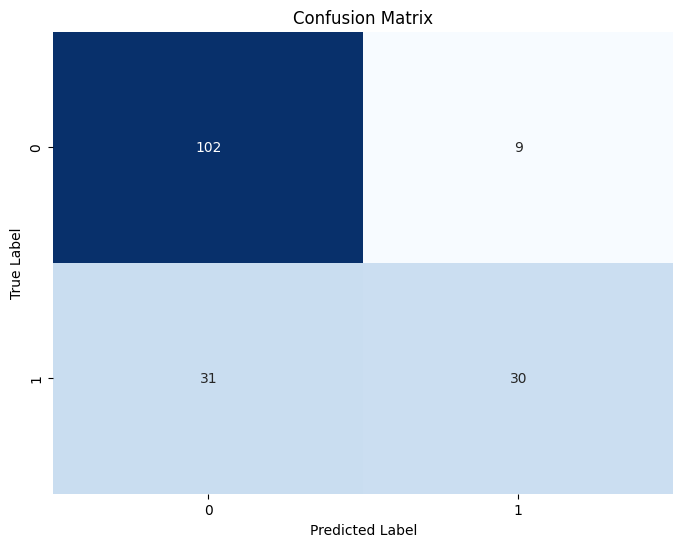

Model: Random Forest Classifier
Sensitivity: 0.4918032786885246
Specificity: 0.918918918918919


(0.918918918918919, 0.4918032786885246)

In [338]:
plot_confusion_matrix(y_test, y_pred_rf)
calculate_specificity_sensitivity(y_test, y_pred_rf, "Random Forest Classifier")


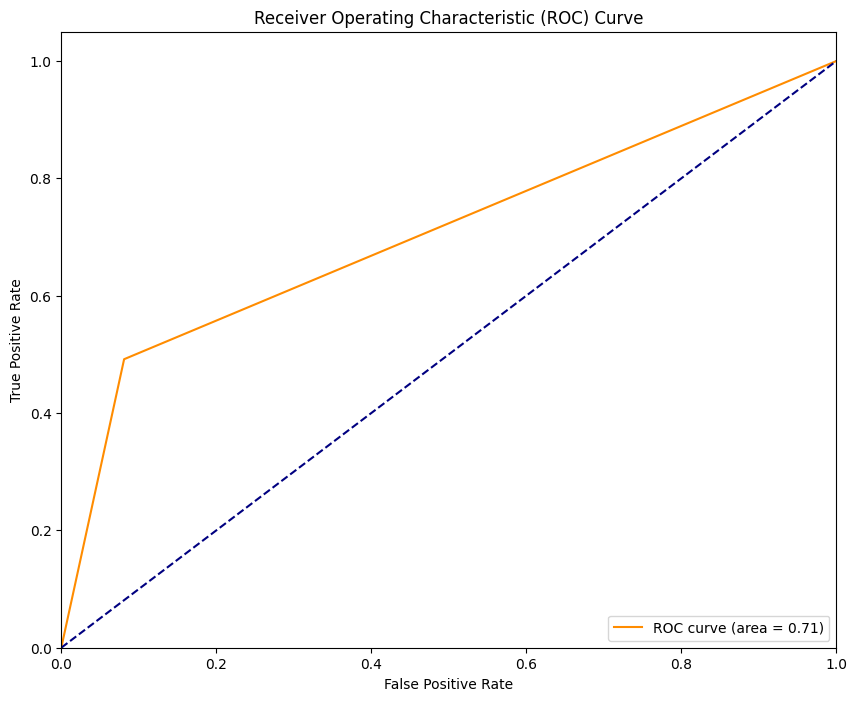

In [341]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predicted probabilities
# Replace y_test and y_pred with your actual data

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Gradient Boosting Classifier

In [335]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
gb_clf_pipe = make_pipeline(StandardScaler(),GradientBoostingClassifier())
gb_clf_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

Testing The Model

In [333]:
# gb_clf_pipe.predict(X_test)
best_model.predict(X_test)

# y_pred_gb = gb_clf_pipe.predict(X_test)
y_pred_gb = best_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of the Gradient Boosting Classifier pipeline: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))
print("Cross Validation Score",get_cross_val_scores(best_model, X_train, y_train, cv=5 ).mean())

Accuracy of the Gradient Boosting Classifier pipeline: 0.7558
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       111
           1       0.74      0.48      0.58        61

    accuracy                           0.76       172
   macro avg       0.75      0.69      0.70       172
weighted avg       0.75      0.76      0.74       172

Cross Validation Score 0.7461210571184995


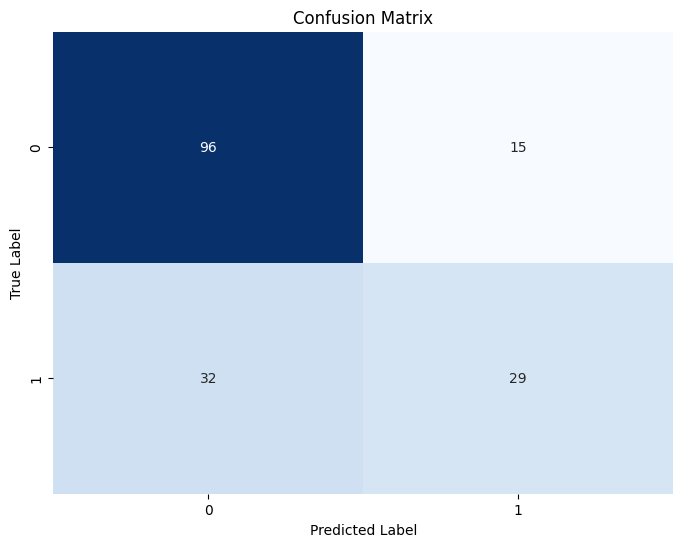

Model: Gradient Boosting Classifier
Sensitivity: 0.47540983606557374
Specificity: 0.8648648648648649


(0.8648648648648649, 0.47540983606557374)

In [330]:
plot_confusion_matrix(y_test, y_pred_gb)
calculate_specificity_sensitivity(y_test, y_pred_gb, "Gradient Boosting Classifier")


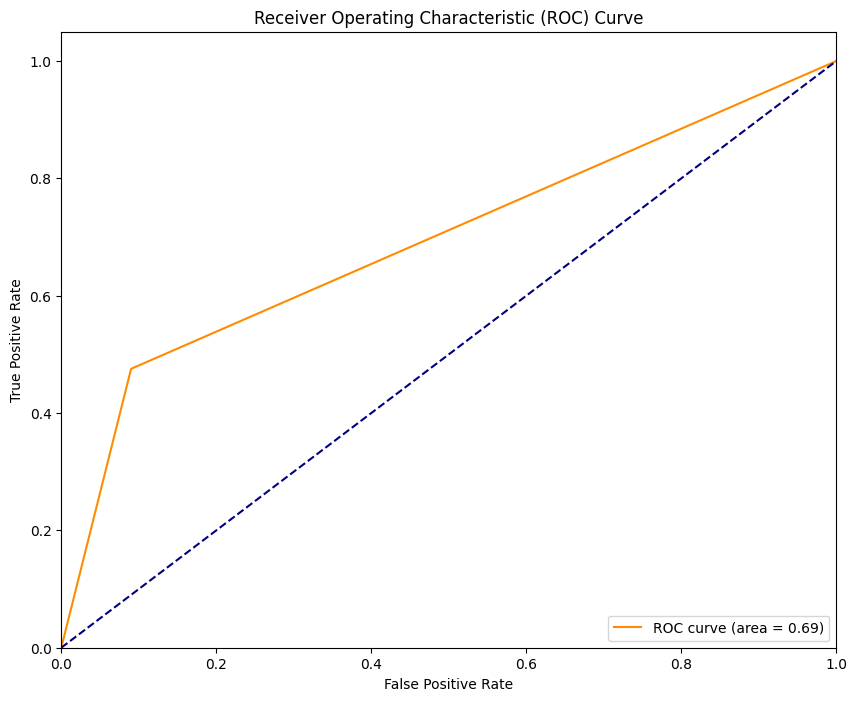

In [343]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predicted probabilities
# Replace y_test and y_pred with your actual data

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_gb)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Models Comparision

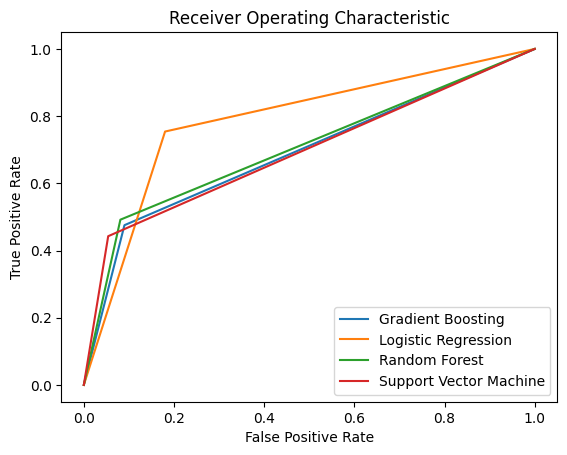

In [346]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
# Compute ROC curve for each model
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)


# Plot ROC curves
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')


# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

# Show the plot
plt.show()


In [347]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate evaluation metrics for each model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
specificity_gb = specificity_score(y_test, y_pred_gb)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
specificity_lr = specificity_score(y_test, y_pred_lr)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
specificity_rf = specificity_score(y_test, y_pred_rf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
specificity_svm = specificity_score(y_test, y_pred_svm)

# Calculate evaluation metrics
metrics_data = {
    'Model': ['Gradient Boosting', 'Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [accuracy_gb, accuracy_lr, accuracy_rf, accuracy_svm],
    'Precision': [precision_gb, precision_lr, precision_rf, precision_svm],
    'Recall': [recall_gb, recall_lr, recall_rf, recall_svm],
    'F1 Score': [f1_gb, f1_lr, f1_rf, f1_svm],
    'Specificity': [specificity_gb, specificity_lr, specificity_rf, specificity_svm]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set index to Model for better readability
metrics_df.set_index('Model', inplace=True)

# Display DataFrame
metrics_df


# visualize the metrics



,Accuracy,Precision,Recall,F1 Score,Specificity
Model,,,,,
Gradient Boosting,0.755814,0.743590,0.475410,0.580000,0.909910
Logistic Regression,0.796512,0.696970,0.754098,0.724409,0.819820
Random Forest,0.767442,0.769231,0.491803,0.600000,0.918919
Support Vector Machine,0.767442,0.818182,0.442623,0.574468,0.945946


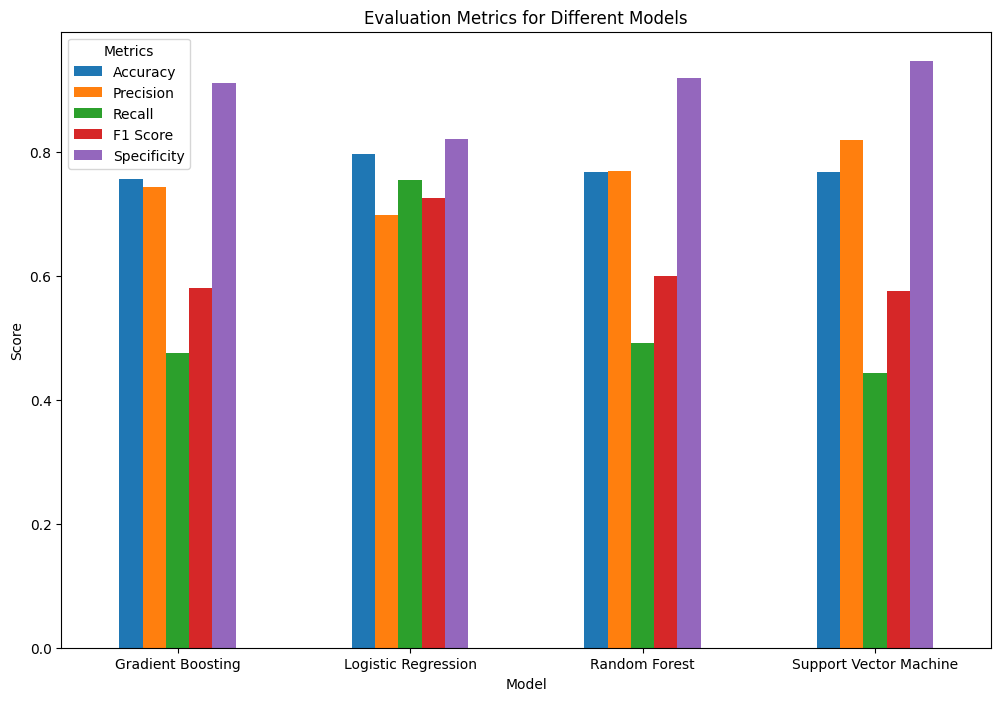

In [349]:
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Evaluation Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()